In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
# load all the data files

allergy_customer = pd.read_csv('ODL_ALLERGY_CUSTOMER.csv')
allergy = pd.read_csv('ODL_ALLERGY.csv')
order_item = pd.read_csv('ODL_ORDER_ITEM.csv')
order =pd.read_csv('ODL_ORDER.csv')
orderable = pd.read_csv('ODL_ORDERABLES.csv')
restaurant = pd.read_csv('ODL_RESTAURANT.csv')


In [12]:
# only use the columns we need
order_item = order_item[['order_id', 'amount', 'id', 'orderable_id']]
order = order[['restaurant_id', 'creation_date', 'customer_id', 'id']]
order['creation_date'] = pd.to_datetime(order['creation_date'])
orderable = orderable[['price', 'restaurant_id', 'id', 'name']]

# We join order_item and order along order_id
df = order_item.set_index('order_id').join(order.set_index('id'))
df.index.name = 'order_id'
df = df.reset_index().set_index('id').sort_index()

#We join df and orderable along orderable_id
df_2 = df.reset_index().set_index('orderable_id').join(orderable.drop(columns=['restaurant_id']).set_index('id'))
df_2.index.name = 'orderable_id'
df_2 = df_2.reset_index().set_index('id')
df_2 = df_2.sort_index()

In [13]:
rest = restaurant[['id' , 'city']]

# We join df_2 with rest aling 'restaurant_id'
df_total = df_2.reset_index().set_index('restaurant_id').join(rest.set_index('id'))
df_total.index.name = 'restaurant_id'
df_total = df_total.reset_index().set_index('id')

In [18]:
df_total

,restaurant_id,orderable_id,order_id,amount,creation_date,customer_id,price,name,city,paid
id,,,,,,,,,,
0,0,4,0,3,2017-04-03 14:20:00,23,29.446886,Dom Perignon,San Francisco,88.340658
1,0,3,0,2,2017-04-03 14:20:00,23,8.925679,Subgum Shrimp Chow Mein,San Francisco,17.851357
2,0,2,0,3,2017-04-03 14:20:00,23,27.744477,"CABERNET SAUVIGNON, Rutherford, Beaulieu",San Francisco,83.233432
3,0,2,1,3,2017-04-03 14:53:00,27,27.744477,"CABERNET SAUVIGNON, Rutherford, Beaulieu",San Francisco,83.233432
4,0,4,1,1,2017-04-03 14:53:00,27,29.446886,Dom Perignon,San Francisco,29.446886
...,...,...,...,...,...,...,...,...,...,...
483980,423,2779,177968,3,2019-03-29 20:45:00,26757,25.100000,Creme Soda,San Francisco,75.300000
483981,423,2780,177968,2,2019-03-29 20:45:00,26757,16.300000,Beef w. Garlic Sauce,San Francisco,32.600000
485246,424,2786,178440,1,2019-03-31 11:12:00,9188,15.800000,LONG-STEM DRISCOLL STRAWBERRIES DIPPED IN CHOC...,New York,15.800000


In [17]:
df_total['paid']= df_total['price']*df_total['amount']
df_total.groupby

,restaurant_id,orderable_id,order_id,amount,creation_date,customer_id,price,name,city,paid
id,,,,,,,,,,
0,0,4,0,3,2017-04-03 14:20:00,23,29.446886,Dom Perignon,San Francisco,88.340658
1,0,3,0,2,2017-04-03 14:20:00,23,8.925679,Subgum Shrimp Chow Mein,San Francisco,17.851357
2,0,2,0,3,2017-04-03 14:20:00,23,27.744477,"CABERNET SAUVIGNON, Rutherford, Beaulieu",San Francisco,83.233432
3,0,2,1,3,2017-04-03 14:53:00,27,27.744477,"CABERNET SAUVIGNON, Rutherford, Beaulieu",San Francisco,83.233432
4,0,4,1,1,2017-04-03 14:53:00,27,29.446886,Dom Perignon,San Francisco,29.446886
...,...,...,...,...,...,...,...,...,...,...
483980,423,2779,177968,3,2019-03-29 20:45:00,26757,25.100000,Creme Soda,San Francisco,75.300000
483981,423,2780,177968,2,2019-03-29 20:45:00,26757,16.300000,Beef w. Garlic Sauce,San Francisco,32.600000
485246,424,2786,178440,1,2019-03-31 11:12:00,9188,15.800000,LONG-STEM DRISCOLL STRAWBERRIES DIPPED IN CHOC...,New York,15.800000


In [16]:
df_NY = df_total[df_total['city']=='New York']
df_SF = df_total[df_total['city']=='San Francisco']

## Most popular dishes

Dishes are ranked in two ways: by amount sold and by revenue generated. The tabels for both cities for dishes sorted by revenue generated are more alike.

### Most popular dishes by amount sold

In [10]:
pop_NY = df_NY[['amount','name']].groupby('name').sum('amount').sort_values('amount',ascending=False)
pop_SF = df_SF[['amount','name']].groupby('name').sum('amount').sort_values('amount',ascending=False)

NameError: name 'df_NY' is not defined

In [11]:
pop_NY.head(10)

NameError: name 'pop_NY' is not defined

In [13]:
pop_SF.head(10)

,amount
name,
Steamed Broccoli w. Shrimp & Chicken,1987
CHILLED BUTTERNUT SQUASH SOUP WITH DILL,1768
Steamed Broccoli w. Chicken,1668
"Wraps: W6 Italian Tuna Wrap (No Mayo No Oil), Plum Tomato, Leaf Lettuce & Sprouts ... 5.95",1620
"KRUG, GRANDE CUVEE, BRUT CHAMPAGNE NV",1560
Manhattan,1525
Chocolate Raspberry Cake,1522
Chicken w. Garlic Sauce,1469
Cream of Cauliflower Soup,1468


### Most popular dishes by revenue

In [14]:
pop_NY_rev = df_NY.groupby('name')[['paid']].sum()
pop_NY_rev.head(20)

,paid
name,
1 lb Chilled Lobster,18571.9
1/2 Lobster,5362.8
1/4 lb. Colossal Crab Meat,15062.8
114- Prosecco Brut N/V Zardetto,12656.6
2004 MERLOT California Blackstone,330.2
2004 SAUVIGNON Western Cape Sincerely Neil Ellis,17907.4
2005 CLARET Napa Valley Newton,18163.8
2007 ASSYRTIKO Santorini Sigalas,800.0
"209- Pinot Grigio 1999, Peter Zemmer (Alto Adige)",4087.2


In [15]:
pop_SF_rev = df_SF.groupby('name')[['paid']].sum()
pop_SF_rev.head(20)

,paid
name,
1 lb Chilled Lobster,12382.4
1/2 Crab Mayonnaise,10817.6
1/2 Lobster,10228.8
1/4 lb. Colossal Crab Meat,10414.0
111- Moet & Chandon Brut Imperial N/V,10734.9
112- Veuve Cliquot Brut N/V,20410.8
113- Dom Perignon 1993,6642.9
114- Prosecco Brut N/V Zardetto,5385.6
"2001 The Vertical Limit: 1/2 bottle of 95, 96, 97 Opus One (3 1/2 Bottles)",19156.0


In [16]:
df_total.groupby('name')[['paid']].sum().head(20)

,paid
name,
1 lb Chilled Lobster,30954.3
1/2 Crab Mayonnaise,10817.6
1/2 Lobster,15591.6
1/4 lb. Colossal Crab Meat,25476.8
111- Moet & Chandon Brut Imperial N/V,10734.9
112- Veuve Cliquot Brut N/V,20410.8
113- Dom Perignon 1993,6642.9
114- Prosecco Brut N/V Zardetto,18042.2
"2001 The Vertical Limit: 1/2 bottle of 95, 96, 97 Opus One (3 1/2 Bottles)",19156.0


In [17]:
dish_names = list(df_total.groupby('name')[['paid']].sum().index)

### nr of sales of orderable distributed by price

In [19]:
df_sales = df_total[['price', 'amount', 'name', 'city']]

In [20]:
# choose a dish to get info from or pick a name from the dish_names list of names

# dish = 'Shrimp Cocktail'
dish = dish_names[0]

dish_price_distribution = df_sales[df_sales['name']==dish].groupby('price').sum()
dish_price_distribution

,amount
price,
28.3,596
28.4,436
28.9,59


In [21]:
# calculate average price
avg_price  = (dish_price_distribution.reset_index()['price']*dish_price_distribution.reset_index()['amount']).sum()
avg_price = np.round(avg_price/dish_price_distribution['amount'].sum(),2)
avg_price

28.37

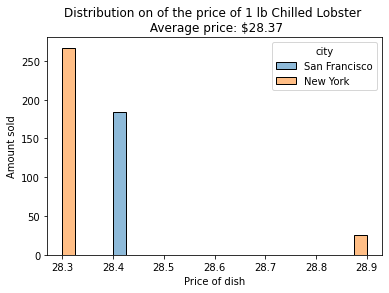

In [22]:
sns.histplot(x='price', data=df_sales[df_sales['name']==dish], hue='city')

plt.title(f'Distribution on of the price of {dish} \n Average price: ${avg_price}')

plt.ylabel('Amount sold')
plt.xlabel('Price of dish')
plt.show()

## trends in dishes sold

### Amount dishes sold per month

In [45]:
s = df_NY[['creation_date', 'amount']].resample('M', on='creation_date').sum()
t = df_SF[['creation_date', 'amount']].resample('M', on='creation_date').sum()
amount_per_month = s.join(t, lsuffix='_NY', rsuffix='_SF')
amount_per_month.head()

,amount_NY,amount_SF
creation_date,,
2017-04-30,2947,3337
2017-05-31,5530,6804
2017-06-30,6610,8066
2017-07-31,12819,15976
2017-08-31,13519,17138


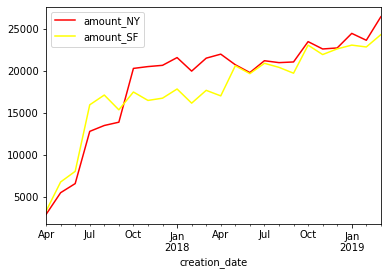

In [46]:
plt.figure()

amount_per_month.amount_NY.plot(color='red')

amount_per_month.amount_SF.plot(color='yellow')

plt.legend()
plt.show()

### Trend per dish

Still working on this part

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df_sales_trends = df_total[['creation_date', 'amount', 'name', 'city']]
df_trends = df_sales_trends.groupby('name').resample('3M', on='creation_date').sum()
df_trends

amount
name                                              creation_date        
1 lb Chilled Lobster                              2017-07-31         52
                                                  2017-10-31        152
                                                  2018-01-31        205
                                                  2018-04-30        132
                                                  2018-07-31        126
...                                                                 ...
wakame and cucumber salad with ume and shiso      2018-12-31         84
                                                  2019-03-31         73
warm valrhona chocolate cake with green tea sauce 2018-11-30         10
                                                  2019-02-28         34
                                                  2019-05-31         10

[10942 rows x 1 columns]

In [25]:
# choose a dish

dish = dish_names[0]
df_trends_per_dish = df_trends.loc[dish]

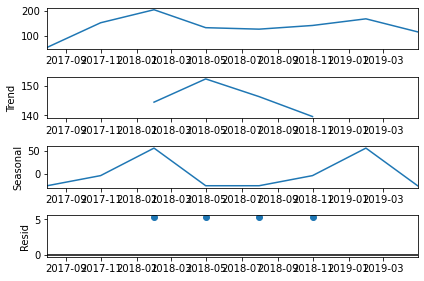

In [29]:
series = df_trends_per_dish
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()